# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [4]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

c:\Users\nelia\OneDrive\Рабочий стол\semester 2\computerVision\.venv_cvis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 612M/612M [02:53<00:00, 3.69MB/s] 

Extracting files...


Path to dataset files: C:\Users\nelia\.cache\kagglehub\datasets\meowmeowmeowmeowmeow\gtsrb-german-traffic-sign\versions\1


### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

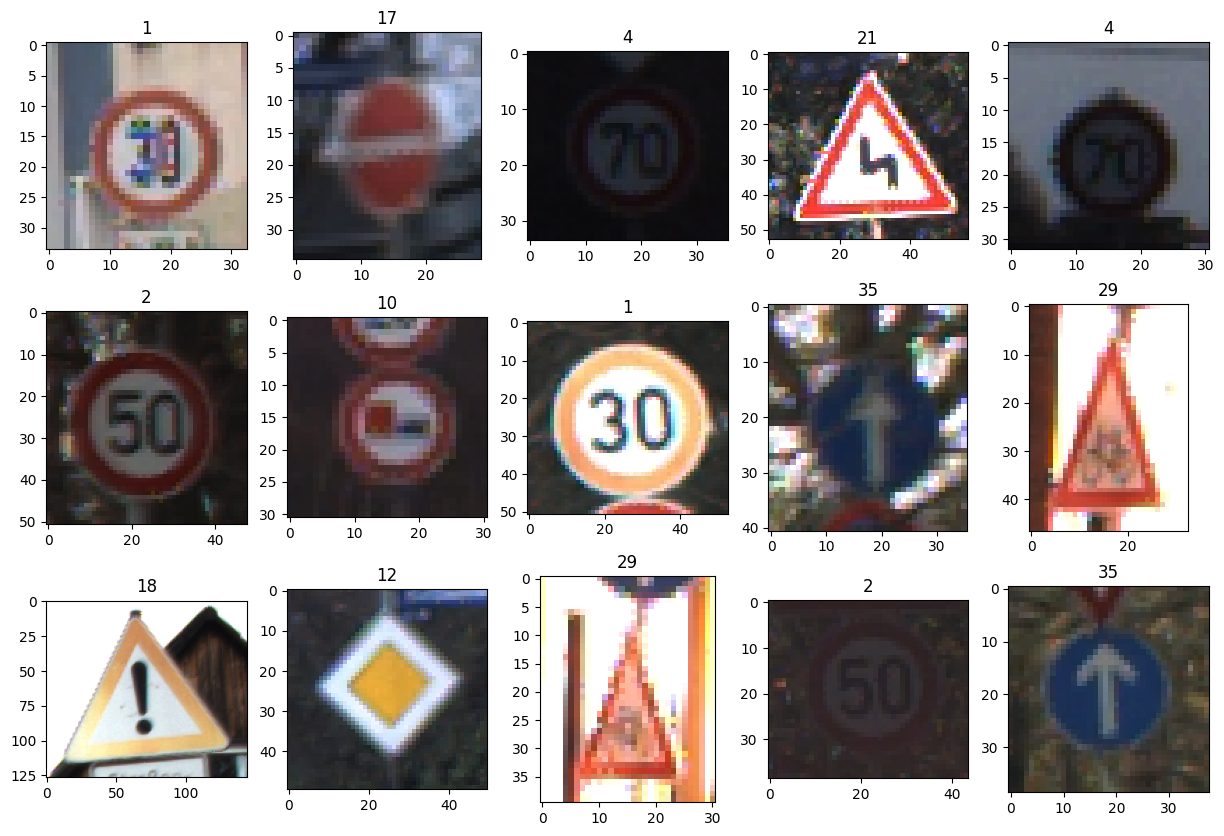

In [5]:
# Load the training labels
root = 'C:/Users/nelia/OneDrive/Рабочий стол/semester 2/computerVision/13/homework' 
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(data.iloc[idx]['Path'])
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [6]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].values

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

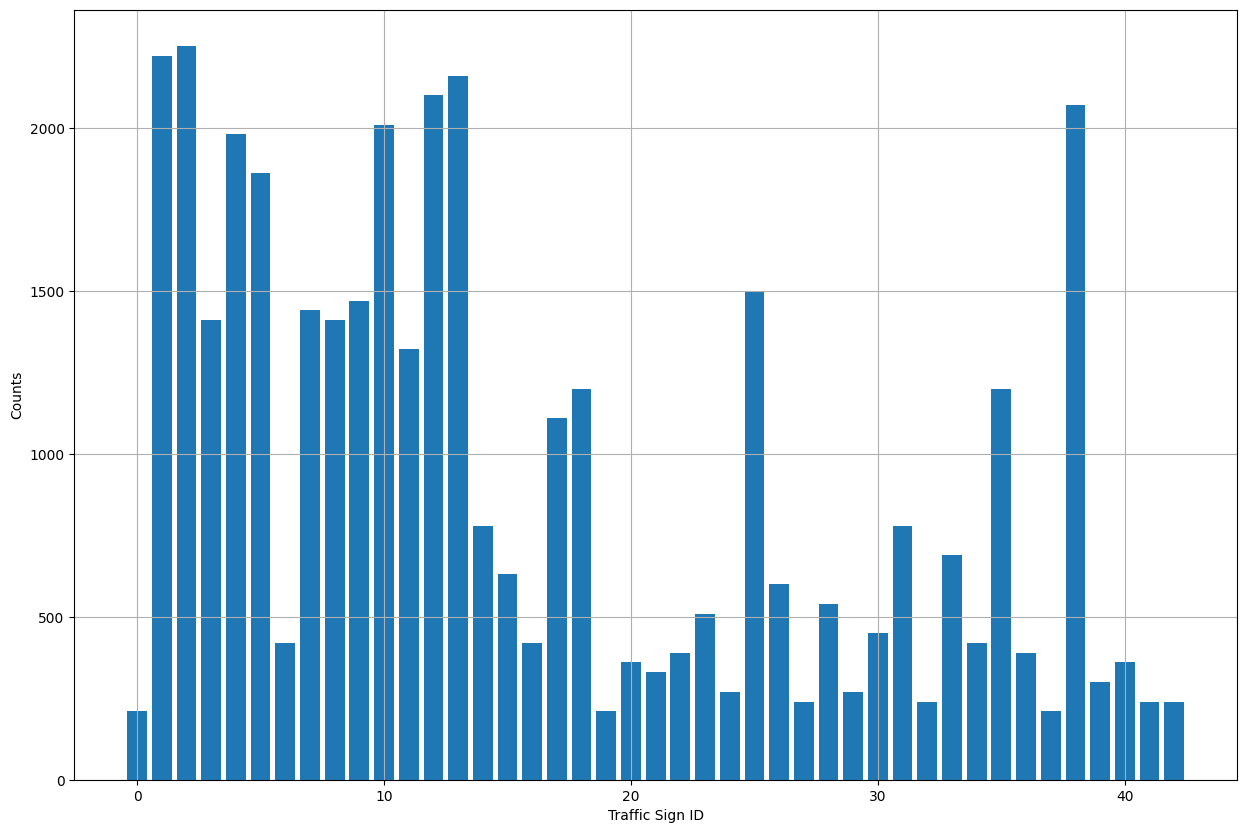

In [7]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')


### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
- no, the dataset is not balanced. Some bars are 5-10 times lower that the other. 
* Are there any classes that are (significantly) over-represented or under-represeneted?
- Yes, 41,42, 19, 32, 0 and other

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [27]:
# add a column with categories of resolutions 
data['resolution'] = data['Width']*data['Height']
bins = [0, 32*32, 64*64, 128*128, 40000*40000]
labels = ['less than 32*32', '32*32 - 64*64', '64*64 - 128*128', 'more than 128*128']

# Cut into bins
data['resolution_cat'] = pd.cut(data['resolution'], bins=bins, labels=labels, right=False)
data.head(100)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Resolution,resoluton,resolution,resolution_cat
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,702,702,702,less than 32*32
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,756,756,756,less than 32*32
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,754,754,754,less than 32*32
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,756,756,756,less than 32*32
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,728,728,728,less than 32*32
...,...,...,...,...,...,...,...,...,...,...,...,...
95,39,38,5,6,33,32,20,Train/20/00020_00003_00005.png,1482,1482,1482,32*32 - 64*64
96,39,38,5,6,34,33,20,Train/20/00020_00003_00006.png,1482,1482,1482,32*32 - 64*64
97,40,38,6,5,35,32,20,Train/20/00020_00003_00007.png,1520,1520,1520,32*32 - 64*64
98,42,39,6,6,37,34,20,Train/20/00020_00003_00008.png,1638,1638,1638,32*32 - 64*64


Counter({'32*32 - 64*64': 25541, '64*64 - 128*128': 6864, 'less than 32*32': 6172, 'more than 128*128': 632})


(Text(0.5, 0, 'Spacial resolution of images'), Text(0, 0.5, 'Counts'))

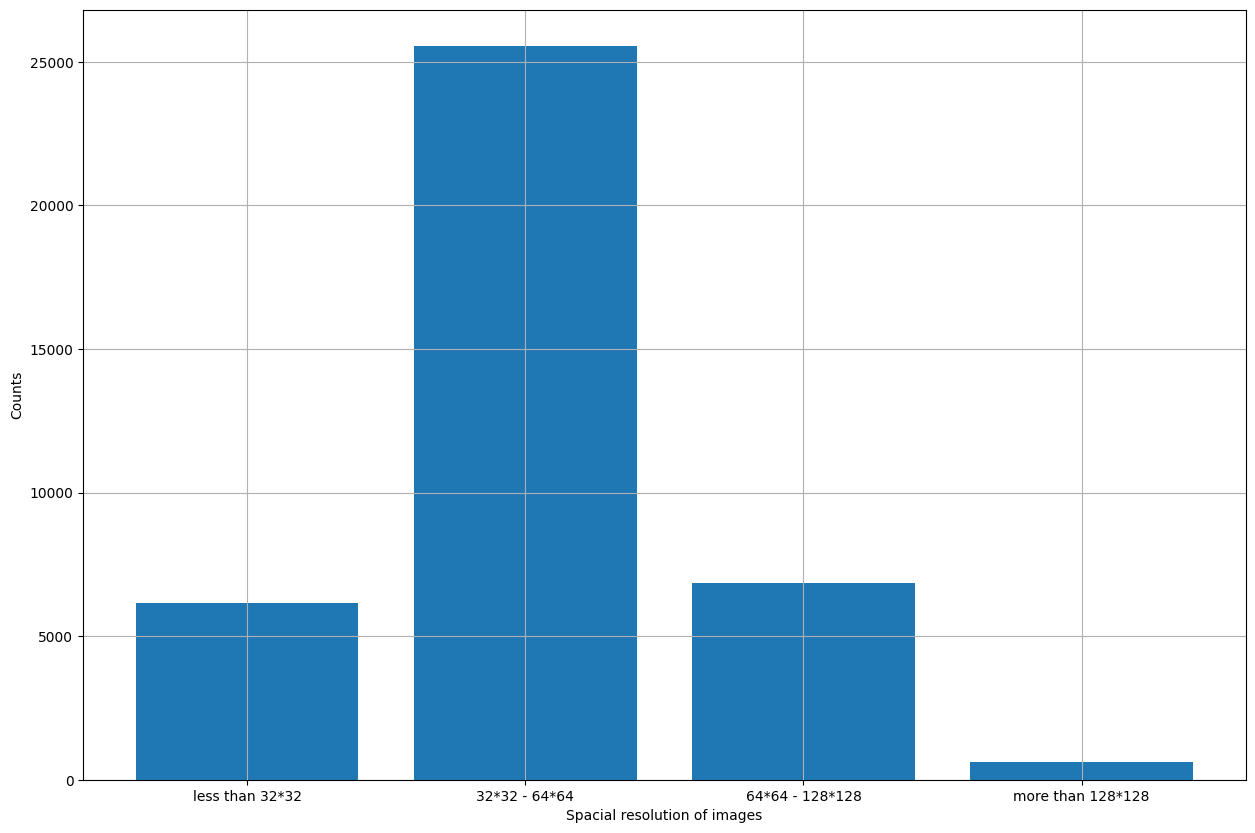

In [ ]:
# Spacial resolution of images 
res_hist = Counter(data['resolution_cat'].values)
print(res_hist)
plt.bar(res_hist.keys(), res_hist.values()), plt.grid(True)
plt.xlabel('Spacial resolution of images'), plt.ylabel('Counts')

# most images are 32*32 - 64*64, and most of them are less than 128*128

In [ ]:
# brightness distribution
brightness = []

bright_hist = Counter(ids)

plt.bar(bright_hist.keys(), bright_hist.values()), plt.grid(True)
plt.xlabel('Brightness distribution for each label'), plt.ylabel('Counts')

In [33]:
data['brightness'] = 0
for i in data.index:
    # Load image
    img = cv2.imread(data.iloc[i]['Path'])
    # calculate mean brightness
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(img)
    data.at[i, 'brightness'] = mean_brightness

data.head()

C:\Users\nelia\AppData\Local\Temp\ipykernel_18804\2248035303.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58.35565052231719' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[i, 'brightness'] = mean_brightness


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Resolution,resoluton,resolution,resolution_cat,brightness
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,702,702,702,less than 32*32,58.355651
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,756,756,756,less than 32*32,58.987213
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,754,754,754,less than 32*32,59.137489
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,756,756,756,less than 32*32,58.350088
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,728,728,728,less than 32*32,57.024267


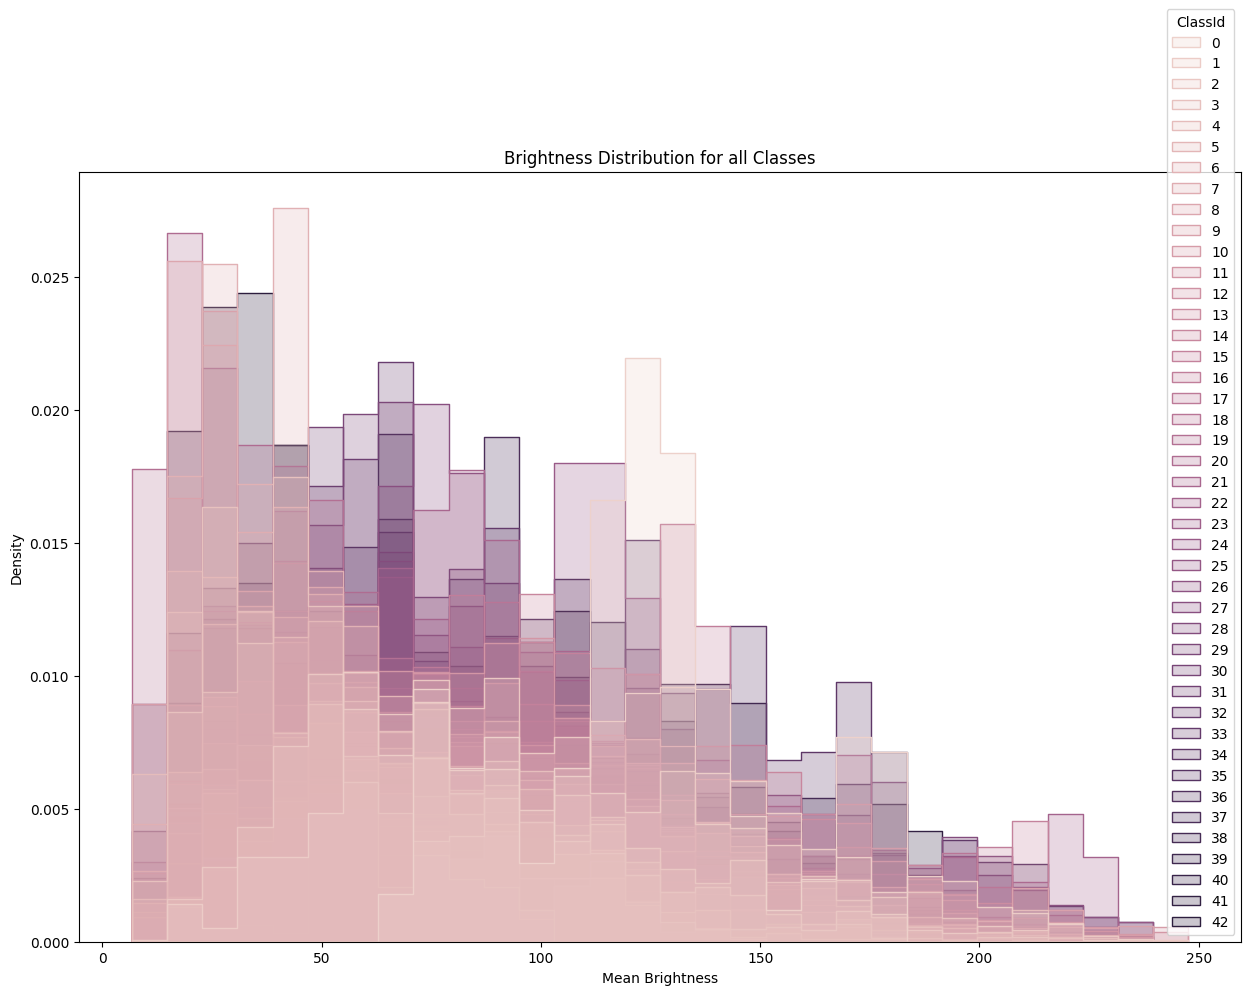

In [47]:
import seaborn as sns
sns.histplot(data=data, x='brightness', hue='ClassId', bins=30, element='step', stat='density', common_norm=False)
plt.title("Brightness Distribution for all Classes")
plt.xlabel("Mean Brightness")
plt.ylabel("Density")
plt.show()


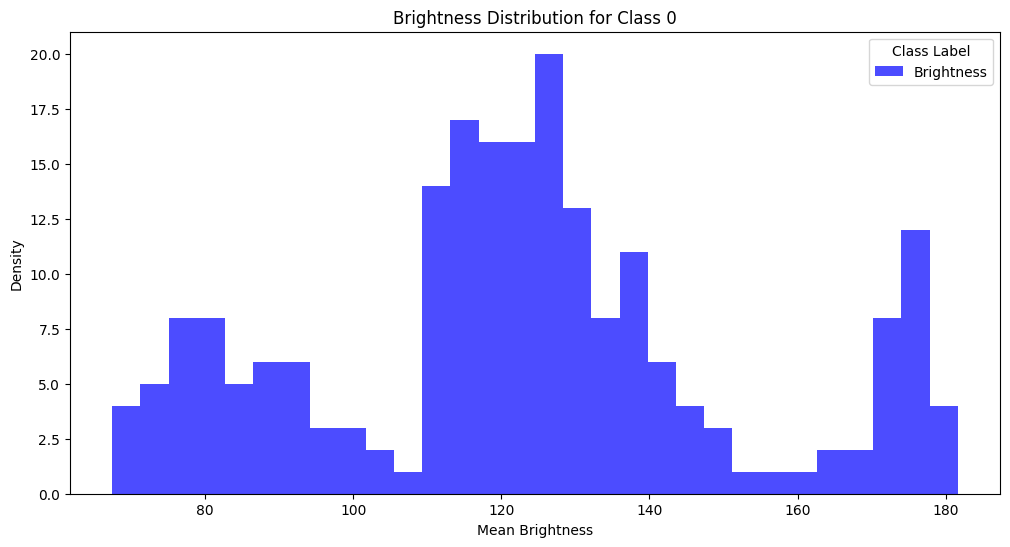

In [ ]:

plt.figure(figsize=(12, 6))
plt.hist(data['brightness'][data['ClassId'] == 0], bins=30, color='blue', alpha=0.7, label='Brightness')
plt.title("Brightness Distribution for Class 0")
plt.xlabel("Mean Brightness")
plt.ylabel("Density")
plt.legend(title='Class Label')
plt.show()

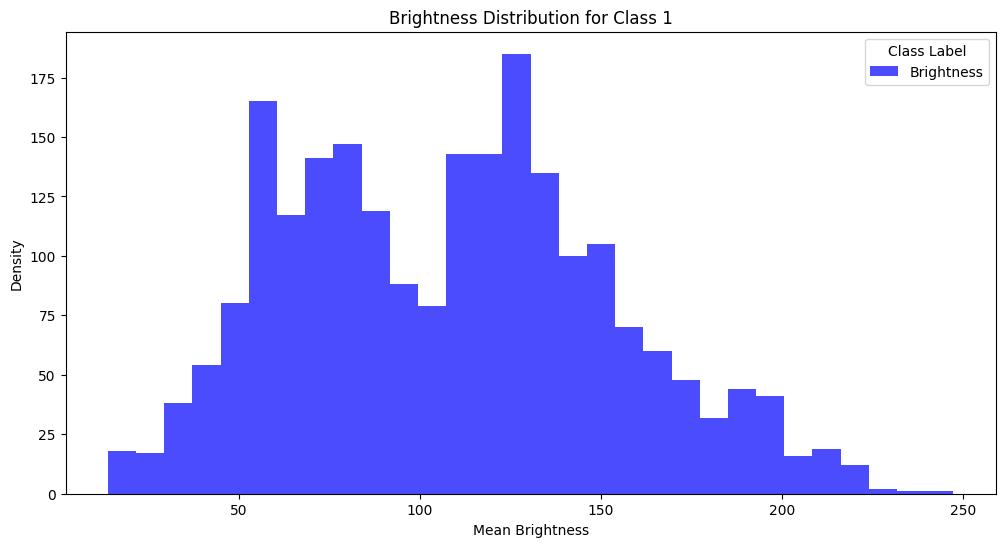

In [43]:
plt.figure(figsize=(12, 6))
plt.hist(data['brightness'][data['ClassId'] == 1], bins=30, color='blue', alpha=0.7, label='Brightness')
plt.title("Brightness Distribution for Class 1")
plt.xlabel("Mean Brightness")
plt.ylabel("Density")
plt.legend(title='Class Label')
plt.show()